In [594]:
# Import Modules
import math
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from warnings import catch_warnings
from warnings import simplefilter
import scipy.stats as stats
import itertools

In [595]:
# objective function
def objective(x):
	model20 = [13.46458095,-198.47099612,75.47320401,153.0072275803083]
	model35 = [18.66491871,-320.58644811,115.4635245,227.21147521930675]
	result = [x[0]*model20[0] + x[1]*model20[1] + x[2]*model20[2] + model20[3],x[0]*model35[0] + x[1]*model35[1] + x[2]*model35[2] + model35[3]]
	return result

In [596]:
# evaluation function
def eval(y):
	return ((y[0] - 87.5)/87.5)**2 + ((y[1] - 76)/76)**2

In [597]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter('ignore')
        return model.predict(X, return_std=True)

In [598]:
# Expected improvement acquisition function
def acquisition(X, Xsamples, model):
    # calculate the best surrgate score found so far
    yhat, _ = surrogate(model, X)
    score1 = np.zeros(len(yhat))
    for i in range(len(yhat)):
        score1[i] = eval(yhat[i])
    best = min(score1)

    # calculate mean and stdev via surrogate function
    mu, std = surrogate(model, Xsamples)
    score2 = np.zeros(len(mu))
    for i in range(len(mu)):
        score2[i] = eval(mu[i])
    # Calculate the expected improvement (EI)
    # Clip std to avoid division by zero
    std = np.clip(std, 1e-9, None)  # Replace None with a suitable upper bound if needed
    std2 = [i[0] for i in std]
    z = (score2 - best)**2 / std2
    ei = (score2 - best)**2 * stats.norm.cdf(z) + std2 * stats.norm.pdf(z)
    return ei

In [599]:
# optimize the acquisition function
def opt_acquisition(X, y, model):
    # random search, generate random samples
    Xs1 = 10 + 10*np.random.random(46)
    Xs2 = 2*np.random.random(46)
    Xs3 = -10 + 20*np.random.random(46)
    Xsamples = np.asarray(list(itertools.product(Xs1,Xs2,Xs3)))
    
    # calculate the acquisition function for each sample
    scores = acquisition(X, Xsamples, model)
    # locate the index of the largest scores
    ix = np.argmin(scores)
    return Xsamples[ix]

In [600]:
# plot real observation vs surrogate function
def plot(X, y, model):
    # Split inputs
    Xe1 = [X[i][0] for i in range(len(X))]
    Xe2 = [X[i][1] for i in range(len(X))]
    Xe3 = [X[i][2] for i in range(len(X))]
    ye1 = [y[i][0] for i in range(len(y))]
    ye2 = [y[i][1] for i in range(len(y))]

    # scatter plot of imputs
    fig, axes = plt.subplots(2,3)
    axes[0,0].scatter(Xe1, ye1)
    axes[0,1].scatter(Xe2, ye1)
    axes[0,2].scatter(Xe3, ye1)
    axes[1,0].scatter(Xe1, ye2)
    axes[1,1].scatter(Xe2, ye2)
    axes[1,2].scatter(Xe3, ye2)

    # line plot of surragte function acorss domain
    Xp1 = np.append(Xe1,10 + 10*np.random.random(20))
    Xp2 = np.append(Xe2,2*np.random.random(20))
    Xp3 = np.append(Xe3,-10 + 20*np.random.random(20))
    Xpred = np.asarray(list(itertools.product(Xp1,Xp2,Xp3)))

    ypred, _ = surrogate(model, Xpred)
    yp1 = [i[0] for i in ypred]
    yp2 = [i[1] for i in ypred]

    Xpl1 = [i[0] for i in Xpred]
    Xpl2 = [i[1] for i in Xpred]
    Xpl3 = [i[2] for i in Xpred]

    axes[0,0].scatter(Xpl1, yp1, s=1)
    axes[0,1].scatter(Xpl2, yp1, s=1)
    axes[0,2].scatter(Xpl3, yp1, s=1)
    axes[1,0].scatter(Xpl1, yp2, s=1)
    axes[1,1].scatter(Xpl2, yp2, s=1)
    axes[1,2].scatter(Xpl3, yp2, s=1)
    # show the plot
    plt.show()

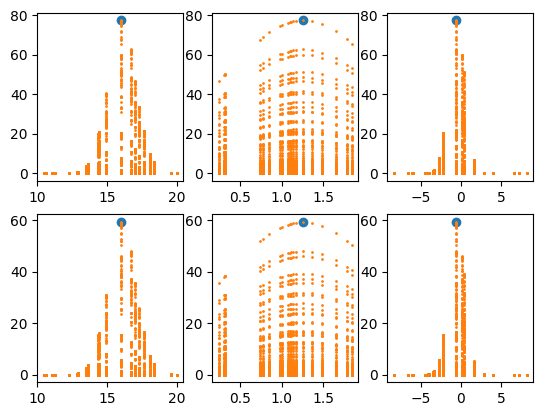

0step:>x = [16.01687708  1.2778148  -0.79640074], f()=[[75.02922746 57.5062724 ]], actual=[54.95167448570854, 24.559840455301696]
1step:>x = [15.90017737  1.29758723 -0.40515572], f()=[[86.6184691  75.47005005]], actual=[78.98462218108429, 61.21740421642076]
2step:>x = [15.82782467  1.36463838 -0.05809837], f()=[[82.76448542 73.37565148]], actual=[90.89624495416595, 78.44372164406826]
3step:>x = [15.85692005  1.35193996 -0.28512014], f()=[[82.31663384 65.64433175]], actual=[76.6742099617194, 56.8449925526312]
4step:>x = [15.72900835  1.41549251  0.19119721], f()=[[95.13478086 85.34809016]], actual=[98.28779135614407, 89.08072512772554]
5step:>x = [15.78219303  1.35550318 -0.10991665], f()=[[87.54788546 73.46120209]], actual=[88.18401389651127, 74.53750962173052]
6step:>x = [15.5818028   1.43725331  0.23070198], f()=[[95.31791097 84.99370029]], actual=[94.96839501929976, 83.91828914122314]
7step:>x = [15.89857272  1.27847527 -0.4099758 ], f()=[[82.34401665 66.74446539]], actual=[82.3923

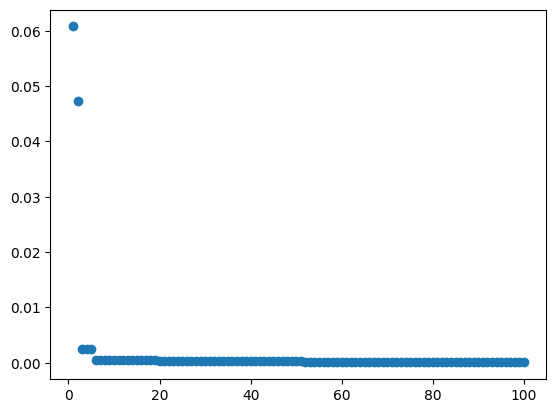

In [601]:
# Sample Data
X = np.asarray([[16.0127,1.26,-0.5425]])
y = np.asarray([[77.5,59.4]])

X1 = [X[i][0] for i in range(len(X))]
X2 = [X[i][1] for i in range(len(X))]
X3 = [X[i][2] for i in range(len(X))]
y1 = [y[i][0] for i in range(len(y))]
y2 = [y[i][1] for i in range(len(y))]

# define the model
model = GaussianProcessRegressor()
model.fit(X,y)

plot(X, y, model)
# perform the optimization process
xp2 = []
yp2 = []
for i in range(100):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [x])
	print(f'{i}step:>x = {x}, f()={est}, actual={actual}')
	# add the data to the dataset
	X = np.vstack((X, x))
	y = np.vstack((y,actual))
	# update the model
	model.fit(X, y)

	score3=np.zeros(len(y))
	for i in range(len(y)):
			score3[i] = eval(y[i])
	ix = np.argmin(score3)

	xp2.append(i)
	yp2.append(score3[ix])

plt.scatter(xp2,yp2)


In [602]:
# best result
score3=np.zeros(len(y))
for i in range(len(y)):
        score3[i] = eval(y[i])
ix = np.argmin(score3)
print(X[ix], y[ix])

plt.scatter(score3)

[15.84087571  1.21725429 -0.48785868] [87.88805091 76.31501939]


TypeError: scatter() missing 1 required positional argument: 'y'